<a href="https://colab.research.google.com/github/AlexandraCrd/RN-2022/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
x=np.array([[1,2,3],[4,5,6]])
print(x)
print(x.ndim)

[[1 2 3]
 [4 5 6]]
2


In [101]:
from keras.datasets import mnist
(train,train_labels), (test, test_labels) = mnist.load_data()
print(train.shape)
print(test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [102]:
batch = train[:128]
batch.shape

(128, 28, 28)

In [103]:
batch = train[:128,: ,: ]
batch.shape

(128, 28, 28)

In [104]:
all((train[:128,: ,: ] == train[:128]).reshape(-1))

True

In [105]:
#sigmoid cu cros entropie binara - 2 clase
#2 neuroni output plus softmax categoriala - multiclase
#regresie mse
#iteratie = parcurgere a unei instante dintr-o epoca

In [106]:
import keras
from keras.datasets import mnist

In [107]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#print the shapes of the training dataset. Just for checking.
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [108]:
from keras import models
from keras import layers

In [109]:
network = models.Sequential()
network.add(layers.Dropout(0.5,input_shape=(28*28,) ))
network.add(layers.Dense(512, activation='relu' ))
network.add(layers.Dropout(0.5 ))
network.add(layers.Dense(10, activation='softmax'))

In [110]:
network.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [111]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [112]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28)) #flatten pe ultimele 2 dim
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels) #nu e bn la nivel de batch ca se uita la toate datele ca sa isi dea seama cate clase sunt
test_labels = to_categorical(test_labels)

In [113]:
train_labels.shape, train_labels.shape

((60000, 10), (60000, 10))

In [114]:
history = network.fit(train_images, train_labels,
  validation_data=(test_images, test_labels),
  epochs=10,
  batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5126 - accuracy: 0.8390 - val_loss: 0.1869 - val_accuracy: 0.9459
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2993 - accuracy: 0.9084 - val_loss: 0.1439 - val_accuracy: 0.9556
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2500 - accuracy: 0.9237 - val_loss: 0.1176 - val_accuracy: 0.9641
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2248 - accuracy: 0.9319 - val_loss: 0.1046 - val_accuracy: 0.9688
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2070 - accuracy: 0.9367 - val_loss: 0.0973 - val_accuracy: 0.9703
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1954 - accuracy: 0.9413 - val_loss: 0.0925 - val_accuracy: 0.9733
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1928 - accuracy: 0.9428 - val_loss: 0.0885 - val_accuracy: 0.9743
Epoch 

In [115]:
history.history

{'loss': [0.5125985145568848,
  0.29926738142967224,
  0.24995377659797668,
  0.22477063536643982,
  0.2070472538471222,
  0.19542764127254486,
  0.19283971190452576,
  0.18049880862236023,
  0.18258219957351685,
  0.17539353668689728],
 'accuracy': [0.8390166759490967,
  0.9084333181381226,
  0.9236999750137329,
  0.9318666458129883,
  0.9367333054542542,
  0.941349983215332,
  0.9428166747093201,
  0.9466666579246521,
  0.9461833238601685,
  0.9494333267211914],
 'val_loss': [0.18690864741802216,
  0.14386186003684998,
  0.11759184300899506,
  0.104611337184906,
  0.09732920676469803,
  0.09254618734121323,
  0.08851157128810883,
  0.08919697254896164,
  0.08679217100143433,
  0.0832398533821106],
 'val_accuracy': [0.945900022983551,
  0.9556000232696533,
  0.9641000032424927,
  0.9688000082969666,
  0.970300018787384,
  0.9732999801635742,
  0.9743000268936157,
  0.9739999771118164,
  0.9742000102996826,
  0.9765999913215637]}

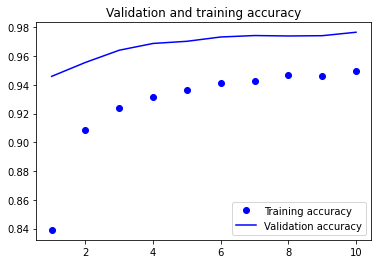

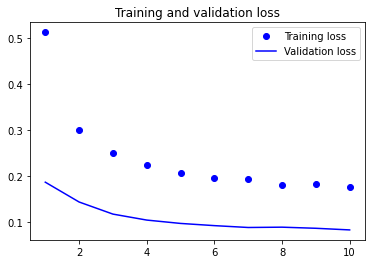

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Validation and training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()